<h1 style="text-align:center"><b>Divvy Cyclistic Group Assignment</b></h1>

<center>

### Group 1

Ilham Taufieq Julfianto - JCDS-0410-002

Bagus Satria Wibawa     - JCDS-0410-003

Irene Selena Mulyono    - JCDS-0410-005

Naufal Amara Syihan     - JCDS-0410-007

Ikhza Syafa Muis        - JCDS-0410-009

</center>

# **1) Case Overview**

## Company Background

Cyclistic is a company built in 2016 that offered bike-share program in Chicago with 5,000+ bike units and 600+ docking stations throughout the state. User can unlock the bike from one station and return it to any other station available. Cyclistic is also more inclusive as they also provide reclining bikes, hand tricycles, and cargo bikes.

## Business Context & Stake Holders

> 💡 **Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders**. 
>

Currently, Cyclistic's marketing strategy solely relies on building general awareness and appealing to broad consumer segments. Cyclistic have a couple of different pricing plans: Casual members will buy single-ride passes or full-day passes, and subscribers will buy annual memberships. 

Although the pricing flexibility helps Cyclistic attract more customers, Moreno, the director of marketing, believes that maximizing the number of annual members will be key to future growth. **Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members.**


**Stake Holders:** 
- **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- **Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
- **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

## Business Task & Questions

Moreno and her team are interested in ***Designing marketing strategies aimed at converting casual riders into annual members*** by analyzing and identifying riders data and trends. Which can be achieved by answering these questions:

1. How annual members and casual riders differ?
2. Why casual riders would buy a membership?
3. How digital media could affect their marketing tactics?


## Data Used

Our team have decided to analyze riders data from 3rd Quarter of 2017 ('Divvy_Trips_2017_Q3.csv'),                       
We will also take the station's coordinates from 2020 data ('Divvy_Trips_2020_Q1.csv') to help with visualization.

# **2) Data Wrangling**

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from branca.element import Figure

## Data Merging

import csv files as needed

In [210]:
df_all = pd.read_csv('Divvy_Trips_2017_Q3.csv')
df_2020 = pd.read_csv('Divvy_Trips_2020_Q1.csv')

In [211]:
# df_all will represents all member types
df_all.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,16734065,9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1985.0
1,16734064,9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1979.0
2,16734063,9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,Clark St & Lincoln Ave,144,Larrabee St & Webster Ave,Subscriber,Male,1993.0
3,16734062,9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Customer,NaN,NaN
4,16734061,9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Subscriber,Female,1994.0


In [212]:
#df_2020 will be used to take station's coordinates as the data from 2017 does not have coordinates
df_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


We made 2 variables to save starting coordinates and also ending coordinates

In [213]:
startcoor = df_2020[['start_station_id','start_lat','start_lng']]
endcoor = df_2020[['end_station_id','end_lat','end_lng']]

Rename columns to make merge process easier

In [214]:
startcoor.rename(columns={'start_station_id' : 'from_station_id'}, inplace= True)
endcoor.rename(columns={'end_station_id' : 'to_station_id'},inplace=True)

/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/2123593020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startcoor.rename(columns={'start_station_id' : 'from_station_id'}, inplace= True)
/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/2123593020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endcoor.rename(columns={'end_station_id' : 'to_station_id'},inplace=True)


take unique coordinates for each station

In [215]:
startcoor.drop_duplicates(keep='first', inplace= True, subset= 'from_station_id')
endcoor.drop_duplicates(keep='first', inplace= True, subset= 'to_station_id')

/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/3658077707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startcoor.drop_duplicates(keep='first', inplace= True, subset= 'from_station_id')
/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/3658077707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endcoor.drop_duplicates(keep='first', inplace= True, subset= 'to_station_id')


merge coordinates into main dataframe

In [216]:
df_all = df_all.merge(startcoor, on='from_station_id', how='left')
df_all = df_all.merge(endcoor, on='to_station_id', how='left')

In [217]:
df_all

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_lat,start_lng,end_lat,end_lng
0,16734065,9/30/2017 23:59:58,10/1/2017 00:05:47,1411,349,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1985.0,41.9030,-87.6975,41.9185,-87.6974
1,16734064,9/30/2017 23:59:53,10/1/2017 00:05:47,3048,354,216,California Ave & Division St,259,California Ave & Francis Pl,Subscriber,Male,1979.0,41.9030,-87.6975,41.9185,-87.6974
2,16734063,9/30/2017 23:59:06,10/1/2017 00:02:52,2590,226,141,Clark St & Lincoln Ave,144,Larrabee St & Webster Ave,Subscriber,Male,1993.0,41.9157,-87.6346,41.9218,-87.6441
3,16734062,9/30/2017 23:58:56,10/1/2017 00:07:37,551,521,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Customer,NaN,NaN,41.8846,-87.6446,41.8866,-87.6580
4,16734061,9/30/2017 23:58:47,10/1/2017 00:07:37,1287,530,96,Desplaines St & Randolph St,217,Racine Ave (May St) & Fulton St,Subscriber,Female,1994.0,41.8846,-87.6446,41.8866,-87.6580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608265,14853218,7/1/2017 00:01:28,7/1/2017 00:20:18,5647,1130,299,Halsted St & Roscoe St,176,Clark St & Elm St,Subscriber,Male,1991.0,41.9437,-87.6490,41.9030,-87.6313
1608266,14853217,7/1/2017 00:01:23,7/1/2017 00:16:54,5802,931,240,Sheridan Rd & Irving Park Rd,347,Ashland Ave & Grace St,Subscriber,Male,1987.0,41.9542,-87.6544,41.9507,-87.6687
1608267,14853216,7/1/2017 00:01:20,7/1/2017 00:18:03,3466,1003,35,Streeter Dr & Grand Ave,47,State St & Kinzie St,Subscriber,Female,1989.0,41.8923,-87.6120,41.8892,-87.6278
1608268,14853215,7/1/2017 00:00:34,7/1/2017 00:20:15,4224,1181,28,Larrabee St & Menomonee St,25,Michigan Ave & Pearson St,Subscriber,Female,1984.0,41.9147,-87.6433,41.8977,-87.6235


### Available Columns after Merging

<center>

<table>
  <tr>
    <td><b>Column</b></td>
    <td><b>Description</b></td>
  </tr>
  <tr>
    <td>trip_id</td>
    <td>The identification number for ride from start station to end station in given time.</td>
  </tr>
  <tr>
    <td>start_time</td>
    <td>Time when the user started riding the bike.</td>
  </tr>
  <tr>
    <td>end_time</td>
    <td>Time when the user finished riding the bike.</td>
  </tr>
  <tr>
    <td>bike_id</td>
    <td>Unique identification number for each bike.</td>
  </tr>
  <tr>
    <td>trip_duration</td>
    <td>How many seconds does the bike ride lasted.</td>
  </tr>
  <tr>
    <td>from_station_id</td>
    <td>The id of start station.</td>
  </tr>
   <tr>
    <td>from_station_name</td>
    <td>The name of the station where the ride begin.</td>
  </tr>
  <tr>
    <td>to_station_id</td>
    <td>The id of end station.</td>
  </tr>
  <tr>
    <td>end_station_name</td>
    <td>The name of the station where the ride end.</td>
  </tr>
  <tr>
    <td>usertype</td>
    <td>The riders type in Cyclistic company.</td>
  </tr>
  <tr>
    <td>gender</td>
    <td>The riders gender.</td>
  </tr>
   <tr>
    <td>birthyear</td>
    <td>The annual members' birth date.</td>
  </tr>
  <tr>
    <td>start_lat</td>
    <td>Latitude of the start station.</td>
  </tr>
  <tr>
    <td>start_lng</td>
    <td>Longitude of the start station.</td>
  </tr>
  <tr>
    <td>end_lat</td>
    <td>Latitude of the end station.</td>
  </tr>
  <tr>
    <td>end_lng</td>
    <td>Longitude of the end station.</td>
  </tr>
</table>


</center>

## Data Sanity Check
- Check data type
- Duplicated entry check
- Missing data check

### Check Data Type

In [218]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608270 entries, 0 to 1608269
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1608270 non-null  int64  
 1   start_time         1608270 non-null  object 
 2   end_time           1608270 non-null  object 
 3   bikeid             1608270 non-null  int64  
 4   tripduration       1608270 non-null  int64  
 5   from_station_id    1608270 non-null  int64  
 6   from_station_name  1608270 non-null  object 
 7   to_station_id      1608270 non-null  int64  
 8   to_station_name    1608270 non-null  object 
 9   usertype           1608270 non-null  object 
 10  gender             1166890 non-null  object 
 11  birthyear          1167022 non-null  float64
 12  start_lat          1608172 non-null  float64
 13  start_lng          1608172 non-null  float64
 14  end_lat            1608157 non-null  float64
 15  end_lng            1608157 non-n

<span style='color:blue'><b>Notes</b></span>: The data type for 'start_time', 'end_time', 'from_station_name', 'to_station_name', 'birthyear' columns are incorrect. We have to fix the data types

In [219]:
# Fix columns data types
df_all['start_time'] = pd.to_datetime(df_all['start_time'])
df_all['end_time'] = pd.to_datetime(df_all['end_time'])
df_all[['from_station_name', 'to_station_name']] = df_all[['from_station_name', 'to_station_name']].astype('str')
df_all['birthyear'] = (df_all['birthyear']).astype('Int64')

In [220]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608270 entries, 0 to 1608269
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1608270 non-null  int64         
 1   start_time         1608270 non-null  datetime64[ns]
 2   end_time           1608270 non-null  datetime64[ns]
 3   bikeid             1608270 non-null  int64         
 4   tripduration       1608270 non-null  int64         
 5   from_station_id    1608270 non-null  int64         
 6   from_station_name  1608270 non-null  object        
 7   to_station_id      1608270 non-null  int64         
 8   to_station_name    1608270 non-null  object        
 9   usertype           1608270 non-null  object        
 10  gender             1166890 non-null  object        
 11  birthyear          1167022 non-null  Int64         
 12  start_lat          1608172 non-null  float64       
 13  start_lng          1608172 

### Check for Duplicates

In [221]:
df_all.duplicated().sum()

0

<span style='color:blue'><b>Notes</b></span>: No data duplicates were found.

### Check for Missing Data

In [222]:
missingData = (df_all.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingData['count'] = df_all.isna().sum()
missingData['percent'] = round(missingData['percent'], 2).astype('str') + '%'
missingData = missingData.reset_index(names='column')
missingData

,column,percent,count
0,trip_id,0.0%,0
1,start_time,0.0%,0
2,end_time,0.0%,0
3,bikeid,0.0%,0
4,tripduration,0.0%,0
5,from_station_id,0.0%,0
6,from_station_name,0.0%,0
7,to_station_id,0.0%,0
8,to_station_name,0.0%,0
9,usertype,0.0%,0


<span style='color:red'><b>Important Notes</b></span>: Missing values in 'gender' and 'birthyear' columns are caused by incomplete data of non-subscriber riders. 

<span style='color:blue'><b>Notes</b></span>: For starting and ending coordinates columns have 0.01% of missing values: We have decided to replaced the missing coordinates with 0 to make data processing easier

In [223]:
df_all['start_lat'] = df_all['start_lat'].fillna(0)
df_all['start_lng'] = df_all['start_lat'].fillna(0)
df_all['end_lat'] = df_all['end_lat'].fillna(0)
df_all['end_lng'] = df_all['end_lng'].fillna(0)

In [224]:
missingData = (df_all.isna().mean() * 100).to_frame().rename(columns={'index':'columns', 0:'percent'})
missingData['count'] = df_all.isna().sum()
missingData['percent'] = round(missingData['percent'], 2).astype('str') + '%'
missingData = missingData.reset_index(names='column')
missingData

,column,percent,count
0,trip_id,0.0%,0
1,start_time,0.0%,0
2,end_time,0.0%,0
3,bikeid,0.0%,0
4,tripduration,0.0%,0
5,from_station_id,0.0%,0
6,from_station_name,0.0%,0
7,to_station_id,0.0%,0
8,to_station_name,0.0%,0
9,usertype,0.0%,0


# **3) Data Pre-Processing**

<span style='color:blue'><b>Notes</b></span>: Drop unwanted columns

In [225]:
df_all.drop(['trip_id', 'bikeid', 'from_station_id', 'to_station_id', 'bikeid'], inplace=True, axis=1)

<span style='color:blue'><b>Notes</b></span>: Create new columns with important values

In [226]:
df_all['start_hour'] = df_all['start_time'].dt.hour
df_all['start_day'] = df_all['start_time'].dt.day_name()
df_all['day_of_week'] = (df_all['start_time'].dt.dayofweek + 1)
df_all['day_type'] = df_all['day_of_week'].map({1: 'weekday', 2: 'weekday', 3: 'weekday', 
                                        4: 'weekday', 5: 'weekday', 6: 'weekend', 7:'weekend'})
df_all['month'] = df_all['start_time'].dt.month
df_all['year'] = df_all['start_time'].dt.year

In [227]:
df_all.head(5)

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_lat,start_lng,end_lat,end_lng,start_hour,start_day,day_of_week,day_type,month,year
0,2017-09-30 23:59:58,2017-10-01 00:05:47,349,California Ave & Division St,California Ave & Francis Pl,Subscriber,Male,1985,41.9030,41.9030,41.9185,-87.6974,23,Saturday,6,weekend,9,2017
1,2017-09-30 23:59:53,2017-10-01 00:05:47,354,California Ave & Division St,California Ave & Francis Pl,Subscriber,Male,1979,41.9030,41.9030,41.9185,-87.6974,23,Saturday,6,weekend,9,2017
2,2017-09-30 23:59:06,2017-10-01 00:02:52,226,Clark St & Lincoln Ave,Larrabee St & Webster Ave,Subscriber,Male,1993,41.9157,41.9157,41.9218,-87.6441,23,Saturday,6,weekend,9,2017
3,2017-09-30 23:58:56,2017-10-01 00:07:37,521,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Customer,NaN,<NA>,41.8846,41.8846,41.8866,-87.6580,23,Saturday,6,weekend,9,2017
4,2017-09-30 23:58:47,2017-10-01 00:07:37,530,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Subscriber,Female,1994,41.8846,41.8846,41.8866,-87.6580,23,Saturday,6,weekend,9,2017


In [228]:
df_all['usertype'].unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

<span style='color:red'><b>Important Notes</b></span>: We found three different types of usertype while there should only be two of them                                    
<span style='color:blue'><b>Notes</b></span>: We decided to convert 'dependent' usertype to 'customer'

In [229]:
df_all.loc[df_all['usertype'] == 'Dependent', 'usertype'] = 'Customer'

In [230]:
df_all['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

<span style='color:blue'><b>Notes</b></span>: Categorizing hour of usage

In [231]:
def hourCategory(hour):
    if 0 <= hour < 6:
        return 'Night (00:00 AM - 06:00 AM)'
    elif 6 <= hour < 12:
        return 'Morning (06:00 AM - 12:00 PM)'
    elif 12 <= hour < 18:
        return 'Afternoon (12:00 PM - 18:00 PM)'
    else:
        return 'Evening (18:00 PM - 00:00 AM)'

# Apply the function to create the 'period' column
df_all['hour_category'] = df_all['start_hour'].apply(hourCategory)

In [232]:

pd.DataFrame(
    {'Nama': df_all.columns,
     'Tipe': df_all.dtypes,
     'NaN (%)': df_all.isna().mean() * 100,
     'Sample': [df_all[col].unique() for col in df_all.columns]}
)

,Nama,Tipe,NaN (%),Sample
start_time,start_time,datetime64[ns],0.000000,"[2017-09-30 23:59:58, 2017-09-30 23:59:53, 201..."
end_time,end_time,datetime64[ns],0.000000,"[2017-10-01 00:05:47, 2017-10-01 00:02:52, 201..."
tripduration,tripduration,int64,0.000000,"[349, 354, 226, 521, 530, 1072, 497, 214, 1398..."
from_station_name,from_station_name,object,0.000000,"[California Ave & Division St, Clark St & Linc..."
to_station_name,to_station_name,object,0.000000,"[California Ave & Francis Pl, Larrabee St & We..."
usertype,usertype,object,0.000000,"[Subscriber, Customer]"
gender,gender,object,27.444397,"[Male, nan, Female]"
birthyear,birthyear,Int64,27.436189,"[1985, 1979, 1993, <NA>, 1994, 1980, 1988, 197..."
start_lat,start_lat,float64,0.000000,"[41.903, 41.9157, 41.8846, 41.9659, 41.9494, 4..."
start_lng,start_lng,float64,0.000000,"[41.903, 41.9157, 41.8846, 41.9659, 41.9494, 4..."


<span style='color:blue'><b>Notes</b></span>: Replacing age outlier with age median

In [233]:
df_all['age'] = 2017 - df_all['birthyear'] # Calculate Age

In [234]:
df_all.loc[df_all['age'] > 65, 'age'] = df_all['age'].median()
df_all.loc[df_all['age'] < 16, 'age'] = 16

In [235]:
df_all.groupby('usertype')['age'].mean() # Mean umur tiap2 usertype

usertype
Customer      34.383598
Subscriber      34.2781
Name: age, dtype: Float64

<span style='color:blue'><b>Notes</b></span>: Creating generation column of subscribers

In [236]:
# Define age ranges for each generation
bins = [0, 27, 43, 59, float('inf')]
labels = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers']

In [237]:
df_all['generation'] = pd.cut(df_all['age'], bins=bins, labels=labels, right=False)

In [238]:
df_all.head(5)

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_lat,start_lng,...,end_lng,start_hour,start_day,day_of_week,day_type,month,year,hour_category,age,generation
0,2017-09-30 23:59:58,2017-10-01 00:05:47,349,California Ave & Division St,California Ave & Francis Pl,Subscriber,Male,1985,41.9030,41.9030,...,-87.6974,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),32,Millennials
1,2017-09-30 23:59:53,2017-10-01 00:05:47,354,California Ave & Division St,California Ave & Francis Pl,Subscriber,Male,1979,41.9030,41.9030,...,-87.6974,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),38,Millennials
2,2017-09-30 23:59:06,2017-10-01 00:02:52,226,Clark St & Lincoln Ave,Larrabee St & Webster Ave,Subscriber,Male,1993,41.9157,41.9157,...,-87.6441,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),24,Gen Z
3,2017-09-30 23:58:56,2017-10-01 00:07:37,521,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Customer,NaN,<NA>,41.8846,41.8846,...,-87.6580,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN
4,2017-09-30 23:58:47,2017-10-01 00:07:37,530,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Subscriber,Female,1994,41.8846,41.8846,...,-87.6580,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),23,Gen Z


# **4) Exploratory Data Analysis**

## Question 1 : How Annual Members and Casual Riders Differ?

## Distribution of user type.

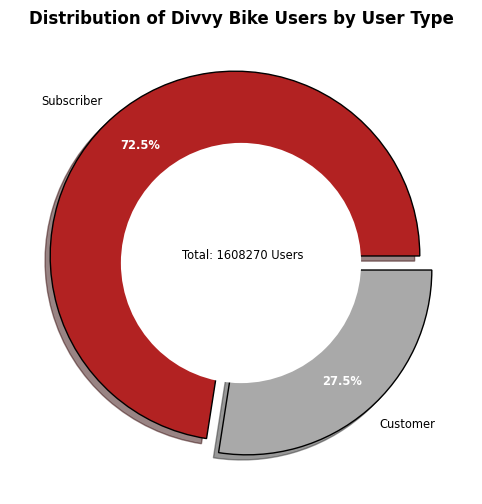

In [239]:
usertype_counts = df_all['usertype'].value_counts().reset_index()
usertype_counts['percent'] = (usertype_counts['count'] / usertype_counts['count'].sum() * 100).round(2)

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    x=usertype_counts['percent'],
    labels=usertype_counts['usertype'], 
    colors=['firebrick', 'darkgrey'],
    autopct='%1.1f%%', 
    pctdistance=0.79, 
    explode=(0.05, 0.05,),
    textprops={"color": "black", 'fontsize': 8.3},
    wedgeprops={'edgecolor': 'black'},
    shadow=True
)
fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.text(0.01, 0.04, 'Total: 1608270 Users', va='center', ha='center', backgroundcolor='white', fontdict={'fontsize': 8.3})

plt.title("Distribution of Divvy Bike Users by User Type", fontsize=12, fontweight='bold', loc='center')

plt.show()

## Despite being a third of the total userbase, customers have higher average trip duration by minutes, which means they take shorter trips at a higher frequency.

/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/2004540325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='usertype', y='tripduration', data=user_tripduration,


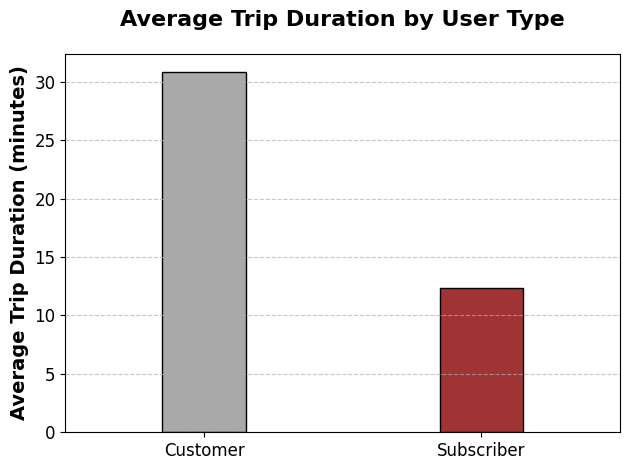

In [240]:
user_tripduration = df_all.groupby('usertype')['tripduration'].mean() / 60 #Mean rata2 tripdur usertype
user_tripduration = user_tripduration.reset_index()

sns.barplot(x='usertype', y='tripduration', data=user_tripduration,
            palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'}, 
            edgecolor='black', capsize=0.2, width=0.3)  # Adjust bar width here
plt.title('Average Trip Duration by User Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Average Trip Duration (minutes)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Riders with the highest trip duration would be under 20 years old

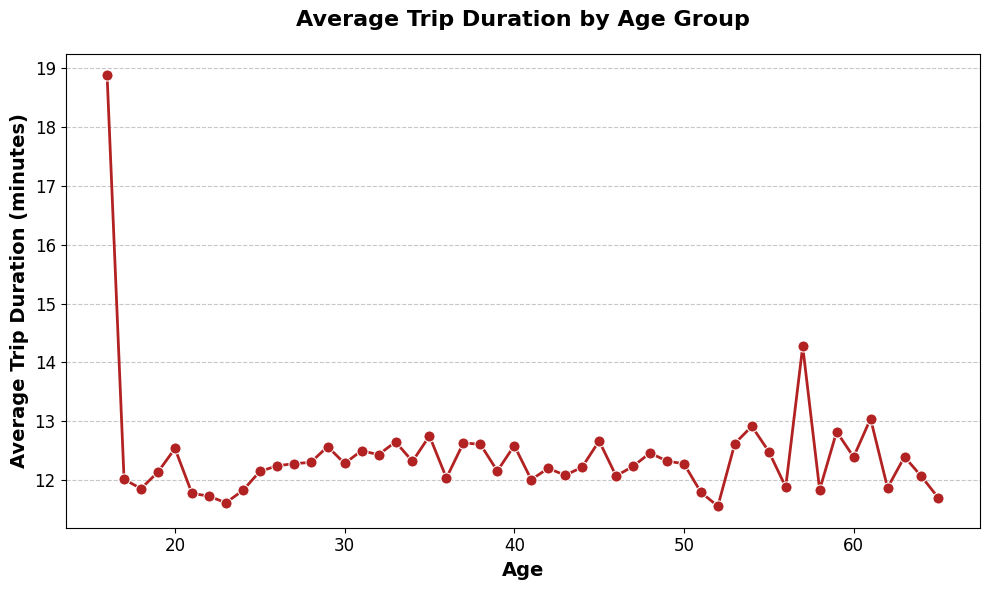

In [241]:
age_tripduration = df_all.groupby('age')['tripduration'].mean() / 60 #Mean rata2 tripdur umur
age_tripduration = age_tripduration.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='tripduration', data=age_tripduration, marker='o', color='firebrick', linewidth=2, markersize=8)
plt.title('Average Trip Duration by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Average Trip Duration (minutes)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Among the riders, of which, who rides for the longest are females. 

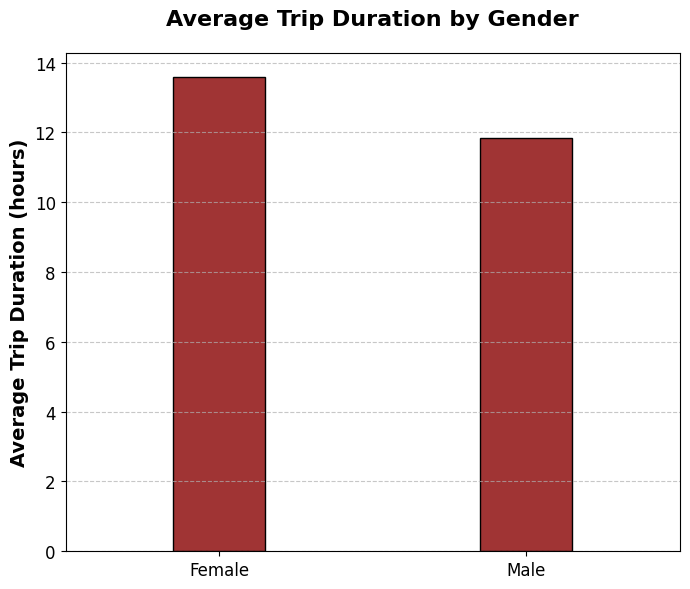

In [242]:
gender_tripduration = df_all.groupby('gender')['tripduration'].mean() / 60 #Mean rata2 tripdur gender
gender_tripduration = gender_tripduration.reset_index()

plt.figure(figsize=(7, 6))
sns.barplot(x='gender', y='tripduration', data=gender_tripduration, color='firebrick', width=0.3, edgecolor='black')
plt.title('Average Trip Duration by Gender', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Average Trip Duration (hours)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Customers ride more in the weekends, as oppose to subscribers that ride more in the weekdays.

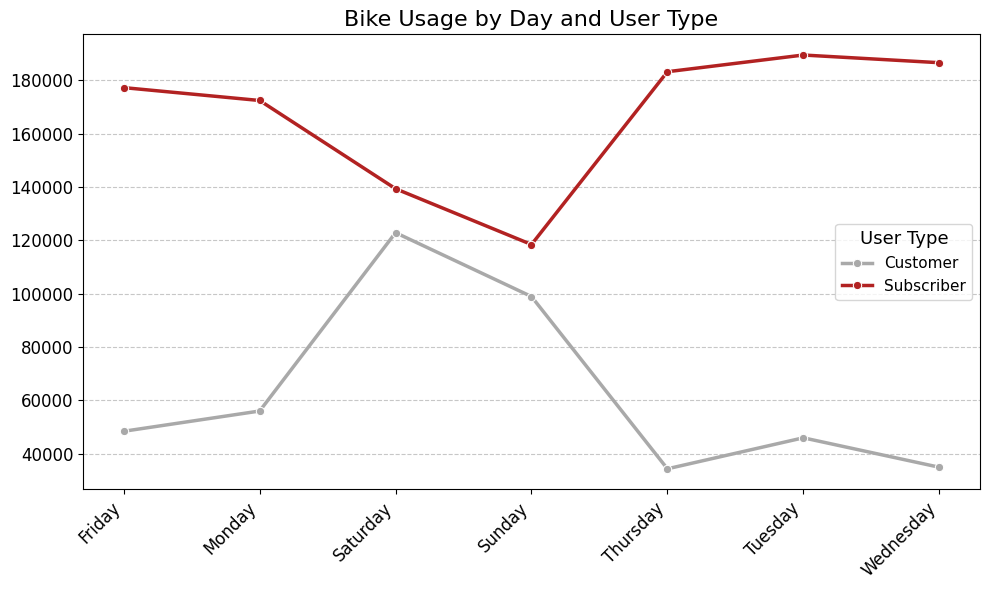

In [244]:
dayUsage = pd.crosstab(index=df_all['start_day'], columns=df_all['usertype']).reset_index(names='start_day') #Hitung pengguna tiap hari
dayUsage = dayUsage.melt(id_vars='start_day', var_name='usertype', value_name='count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='start_day', y='count', hue='usertype', data=dayUsage,
             palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'}, marker='o', linewidth=2.5)
plt.title('Bike Usage by Day and User Type', fontsize=16)
plt.xlabel(None)
plt.ylabel('')
plt.legend(title='User Type', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## The proportion of usage according to usertype, during the obsever quarter.

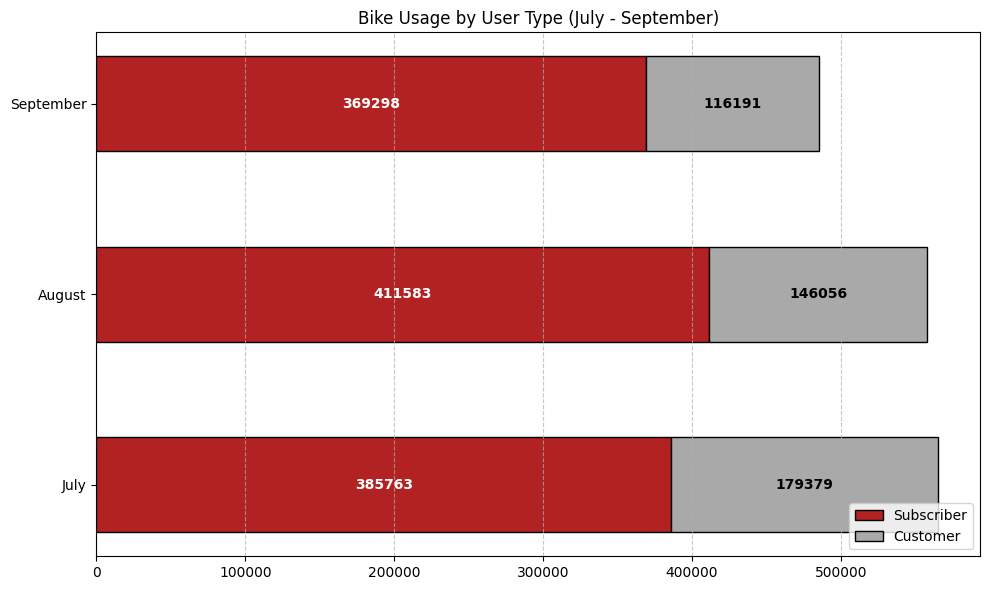

In [246]:
# Define the months
months = [7, 8, 9]

# Initialize lists to store counts
subscriber_counts = []
customer_counts = []

# Loop through each month to calculate counts
for month in months:
    month_data = df_all[df_all['month'] == month]['usertype'].value_counts()
    subscriber_count = month_data.get('Subscriber', 0)
    customer_count = month_data.get('Customer', 0)
    subscriber_counts.append(subscriber_count)
    customer_counts.append(customer_count)

# Plotting
plt.figure(figsize=(10, 6))

# Create stacked horizontal bars for each month
bar_width = 0.5
bar_positions = range(len(months))

# Plot Subscriber counts
plt.barh(bar_positions, subscriber_counts, height=bar_width, color='firebrick', edgecolor='black', label='Subscriber')

# Plot Customer counts stacked on top of Subscriber counts
plt.barh(bar_positions, customer_counts, height=bar_width, left=subscriber_counts, color='darkgrey', edgecolor='black', label='Customer')

# Add data labels
for i, (subscriber, customer) in enumerate(zip(subscriber_counts, customer_counts)):
    plt.text(subscriber / 2, i, f'{subscriber}', va='center', ha='center', color='white', fontweight='bold')
    plt.text(subscriber + customer / 2, i, f'{customer}', va='center', ha='center', color='black', fontweight='bold')

# Add labels, title, and legend
plt.xlabel(None)
plt.ylabel(None)
plt.title('Bike Usage by User Type (July - September)')
plt.yticks(bar_positions, ['July', 'August', 'September'])
plt.legend(loc='lower right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## (Left) The overall bike usage by time                            
 ## (Right) Bike usage by time and usertype

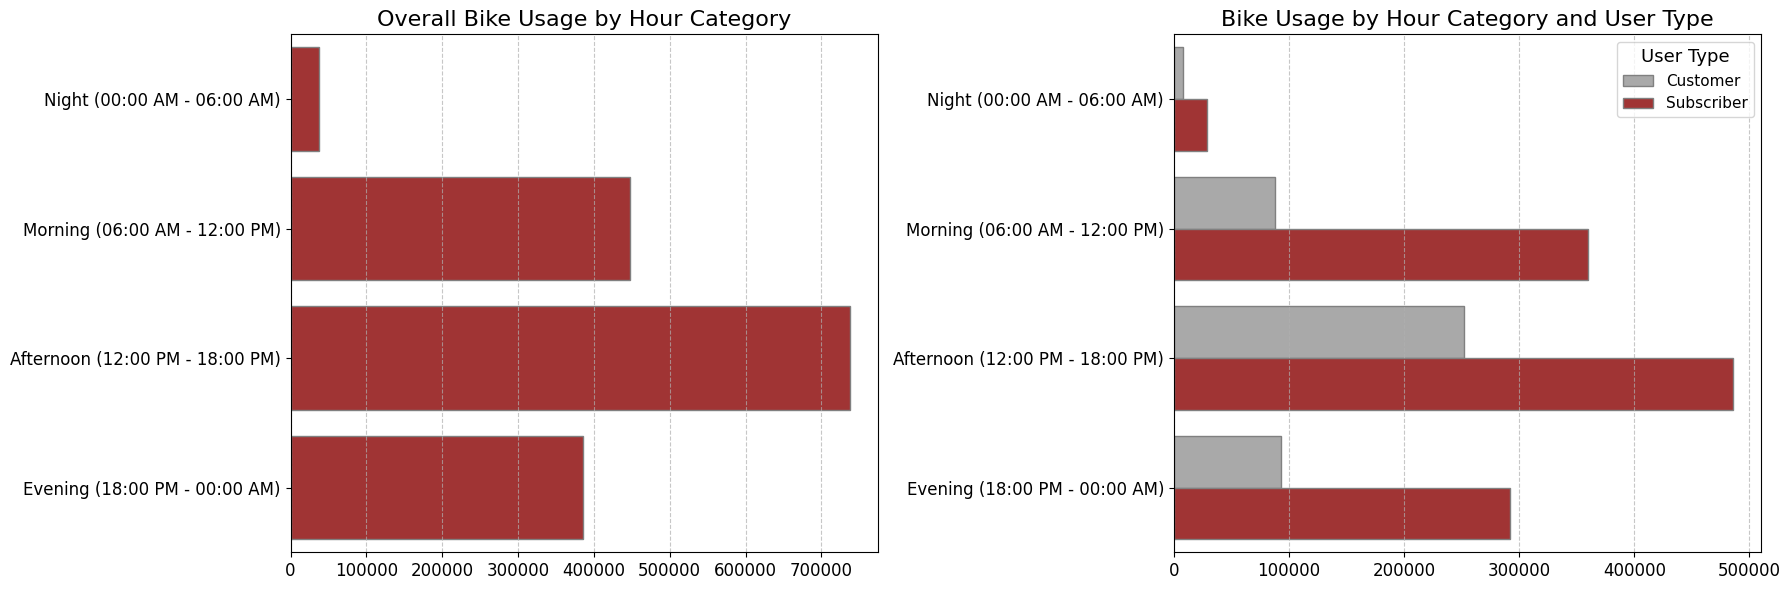

In [247]:
timeUsage = pd.crosstab(index=df_all['hour_category'], columns=df_all['usertype']).reset_index()
timeUsage = timeUsage.melt(id_vars='hour_category', var_name='usertype', value_name='count')

hour_categories_order = [
    'Night (00:00 AM - 06:00 AM)', 
    'Morning (06:00 AM - 12:00 PM)', 
    'Afternoon (12:00 PM - 18:00 PM)', 
    'Evening (18:00 PM - 00:00 AM)'
]

timeUsage['hour_category'] = pd.Categorical(timeUsage['hour_category'], categories=hour_categories_order, ordered=True)
timeUsage = timeUsage.sort_values('hour_category')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})

overall_counts = df_all['hour_category'].value_counts().loc[hour_categories_order]
sns.barplot(x=overall_counts.values, y=overall_counts.index, color='firebrick', edgecolor='gray', ax=ax1)

ax1.set_title('Overall Bike Usage by Hour Category', fontsize=16)
ax1.set_xlabel(None)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(axis='x', linestyle='--', alpha=0.7)
ax1.set_ylabel(None)

sns.barplot(x='count', y='hour_category', hue='usertype', data=timeUsage,
            palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'}, edgecolor='gray', ax=ax2)

ax2.set_title('Bike Usage by Hour Category and User Type', fontsize=16)
ax2.set_xlabel(None)
ax2.legend(title='User Type', title_fontsize='13', fontsize='11', loc='upper right')
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.grid(axis='x', linestyle='--', alpha=0.7)
ax2.set_ylabel(None)

plt.tight_layout()
plt.show()

## The trend of usage by time.

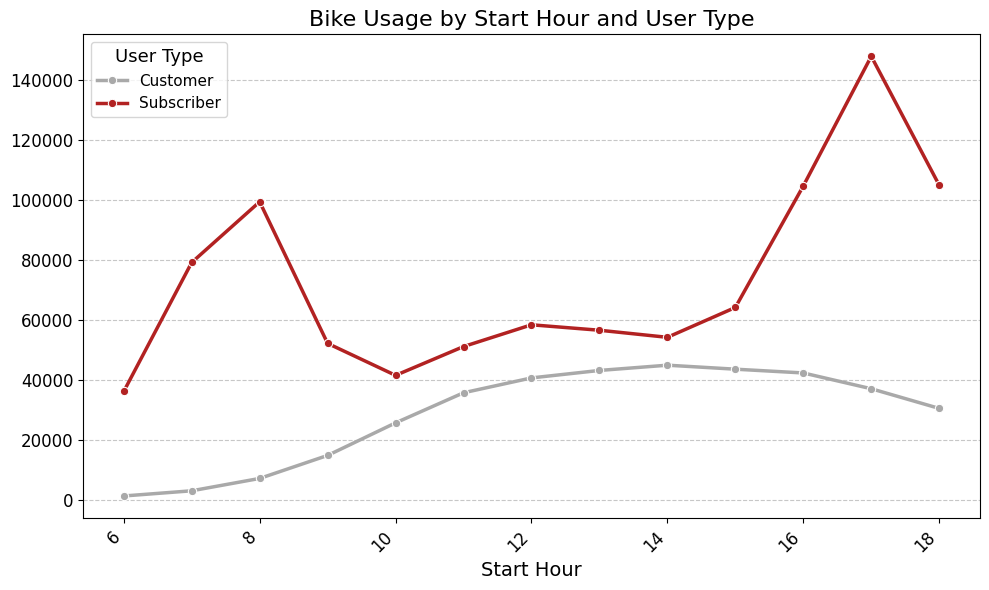

In [248]:
hrsUsage = pd.crosstab(index=df_all['start_hour'], columns=df_all['usertype']).reset_index() #Hitung freq per kategori jam
hrsUsage = hrsUsage.melt(id_vars='start_hour', var_name='usertype', value_name='count')
hrsUsage_filtered = hrsUsage[(hrsUsage['start_hour'] >= 6) & (hrsUsage['start_hour'] <= 18)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='start_hour', y='count', hue='usertype', data=hrsUsage_filtered,
             palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'}, marker='o', linewidth=2.5)
plt.title('Bike Usage by Start Hour and User Type', fontsize=16)
plt.xlabel('Start Hour', fontsize=14)
plt.ylabel(None)
plt.legend(title='User Type', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Rush hours are by time and day.

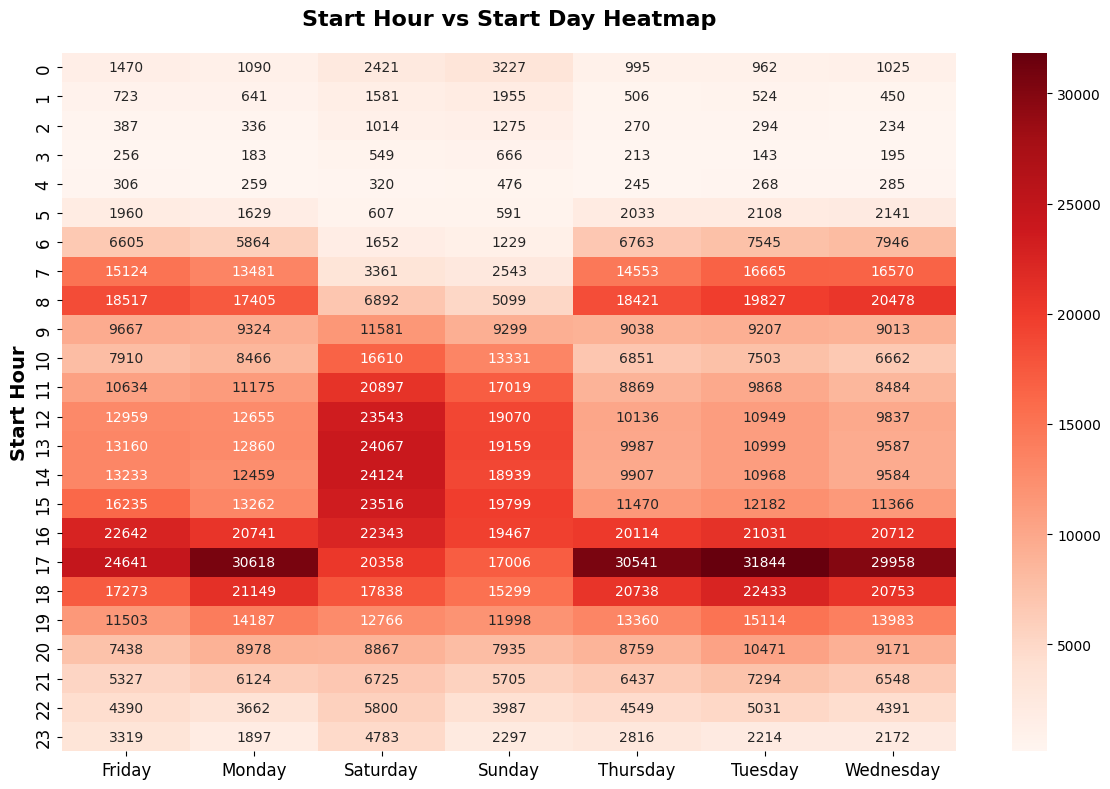

In [249]:
startDay = pd.crosstab(index=df_all['start_hour'], columns=df_all['start_day'])

plt.figure(figsize=(12, 8))
sns.heatmap(startDay, cmap='Reds', annot=True, fmt='d')
plt.title('Start Hour vs Start Day Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Start Hour', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Most popular stations.

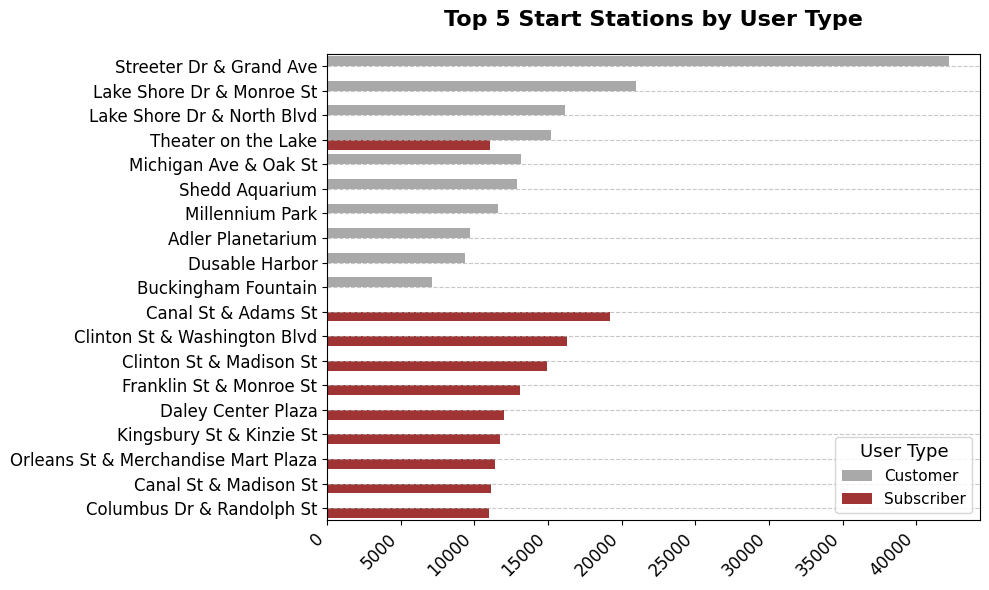

In [250]:
top_from_stations = df_all.groupby(['usertype', 'from_station_name']).size().reset_index(name='count')
top_from_stations = top_from_stations.sort_values(['usertype', 'count'], ascending=[True, False])
top_from_stations = top_from_stations.groupby('usertype').head(10).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='from_station_name', hue='usertype', data=top_from_stations, palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'})
plt.title('Top 5 Start Stations by User Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='User Type', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<span style='color:red'><b>Summarize answer for question 1 </b></span>:
-  The difference between Customers and subscribers are Customers tend to frequent places that are recreational and use divvy to ride short distances in traversing this sites. 
- This explains why Customers ride more frequently during the weekends.While Subscribers are commuters, who use divvy in their day to day business. As they take up the majority of usage in the weekdays and are higher in frequency during working hours.

## Question 2 : Why Casual Riders would Buy a Membership?

<span style='color:red'><b>Summarize answer for question 2 </b></span>:
- Customers would be motivated to purchase a subscription if they were to be incentivized to do so. If the customer were to be offered a program geared towards this segment, it could prove to be ample motivation for them to consider in purchasing a subscription. 
- In addition, it is important to communicate the convenience of flexibility to the customers, especially for short distance trips when there are no other mode of transport available

In [251]:
df_customer = df_all[df_all['usertype']=='Customer']

In [252]:
df_customer.head(5)

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_lat,start_lng,...,end_lng,start_hour,start_day,day_of_week,day_type,month,year,hour_category,age,generation
3,2017-09-30 23:58:56,2017-10-01 00:07:37,521,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Customer,NaN,<NA>,41.8846,41.8846,...,-87.6580,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN
8,2017-09-30 23:56:59,2017-10-01 00:20:17,1398,Millennium Park,Eckhart Park,Customer,NaN,<NA>,41.8810,41.8810,...,-87.6610,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN
24,2017-09-30 23:53:24,2017-10-01 00:12:41,1157,Michigan Ave & Oak St,Stockton Dr & Wrightwood Ave,Customer,NaN,<NA>,41.9010,41.9010,...,-87.6387,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN
25,2017-09-30 23:53:22,2017-10-01 00:12:36,1154,Michigan Ave & Oak St,Stockton Dr & Wrightwood Ave,Customer,NaN,<NA>,41.9010,41.9010,...,-87.6387,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN
27,2017-09-30 23:53:01,2017-10-01 00:12:41,1180,Michigan Ave & Oak St,Stockton Dr & Wrightwood Ave,Customer,NaN,<NA>,41.9010,41.9010,...,-87.6387,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN


In [253]:
df_customer['paid price'] = (1 + (df_customer['tripduration']/60*0.18)).round(2)

/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/1220988468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer['paid price'] = (1 + (df_customer['tripduration']/60*0.18)).round(2)


In [254]:
df_customer.head(3)

,start_time,end_time,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,start_lat,start_lng,...,start_hour,start_day,day_of_week,day_type,month,year,hour_category,age,generation,paid price
3,2017-09-30 23:58:56,2017-10-01 00:07:37,521,Desplaines St & Randolph St,Racine Ave (May St) & Fulton St,Customer,NaN,<NA>,41.8846,41.8846,...,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN,2.56
8,2017-09-30 23:56:59,2017-10-01 00:20:17,1398,Millennium Park,Eckhart Park,Customer,NaN,<NA>,41.8810,41.8810,...,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN,5.19
24,2017-09-30 23:53:24,2017-10-01 00:12:41,1157,Michigan Ave & Oak St,Stockton Dr & Wrightwood Ave,Customer,NaN,<NA>,41.9010,41.9010,...,23,Saturday,6,weekend,9,2017,Evening (18:00 PM - 00:00 AM),<NA>,NaN,4.47


In [255]:
df_customer['paid price'].median()

5.1

<span style='color:blue'><b>Notes</b></span>: According to the data, we can see that the median amount that customer have to pay per ride is $5.1. The customers would be better off financially if they decide to purchase the annual plan because it is more cost effective

## Question 3 : How Digital Media could Affect Their Marketing Tactics?

## Number of usage during the observed quarter.

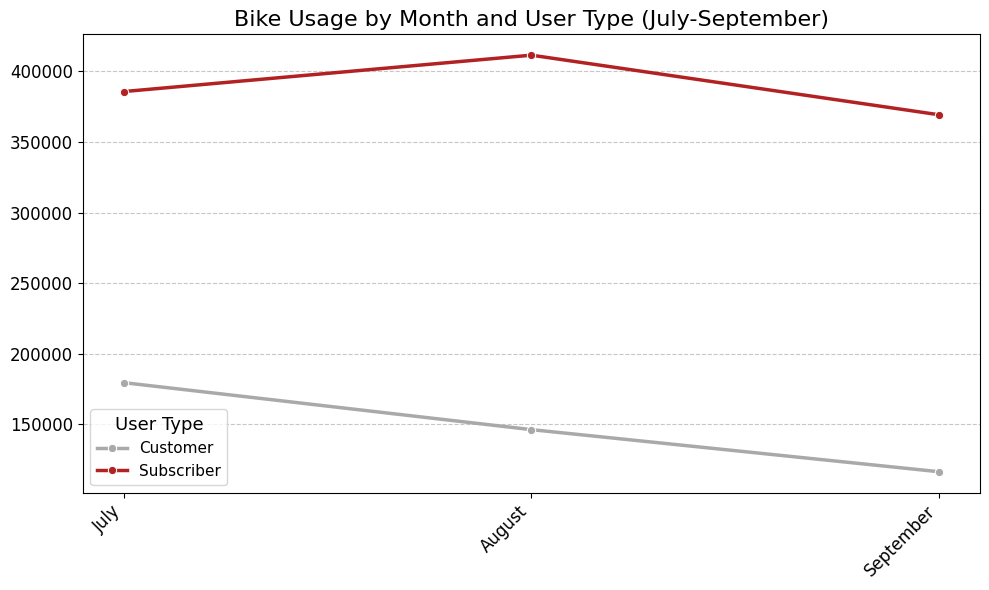

In [260]:
monthUsage = pd.crosstab(index=df_all['month'], columns=df_all['usertype']).reset_index(names='month')
monthUsage = monthUsage.melt(id_vars='month', var_name='usertype', value_name='usage_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='usage_count', hue='usertype', data=monthUsage,
             palette={'Customer': 'darkgrey', 'Subscriber': 'firebrick'}, marker='o', linewidth=2.5)
plt.title('Bike Usage by Month and User Type (July-September)', fontsize=16)
plt.xlabel(None)
plt.ylabel('')
plt.legend(title='User Type', title_fontsize=13, fontsize=11)
plt.xticks(ticks=[7, 8, 9], labels=['July', 'August', 'September'], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top Destination Stations for Riders.

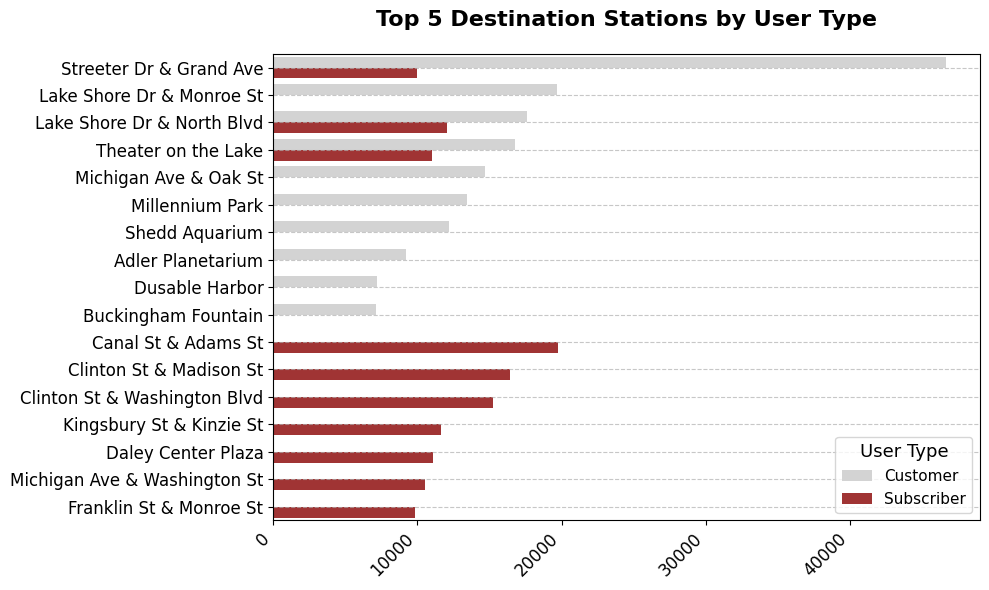

In [256]:
top_to_stations = df_all.groupby(['usertype', 'to_station_name']).size().reset_index(name='count')
top_to_stations = top_to_stations.sort_values(['usertype', 'count'], ascending=[True, False])
top_to_stations = top_to_stations.groupby('usertype').head(10).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='to_station_name', hue='usertype', data=top_to_stations, palette={'Customer': 'lightgrey', 'Subscriber': 'firebrick'})
plt.title('Top 5 Destination Stations by User Type', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='User Type', title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Customer uses divvy bikes to visit recreational places while Member uses divvy bikes to go to city center

In [257]:
fig = Figure(width=500, height=550)
map = folium.Map(location=[41.90517269859121, -87.63558868586368], zoom_start=13)
fig.add_child(map)

customer_stations = [
    {'location': [41.8923, -87.612], 'tooltip': 'Top 1 Customer Station', 'popup': 'Streeter Dr & Grand Ave'},
    {'location': [41.881, -87.6167], 'tooltip': 'Top 2 Customer Station', 'popup': 'Lake Shore Dr & Monroe St'},
    {'location': [41.9117, -87.6268], 'tooltip': 'Top 3 Customer Station', 'popup': 'Lake Shore Dr & North Blvd'},
    {'location': [41.9263, -87.6308], 'tooltip': 'Top 4 Customer Station', 'popup': 'Theater on the Lake'},
    {'location': [41.901, -87.6238], 'tooltip': 'Top 5 Customer Station', 'popup': 'Michigan Ave & Oak St'},
    {'location': [41.8672, -87.6154], 'tooltip': 'Top 6 Customer Station', 'popup': 'Shedd Aquarium'},
    {'location': [41.881, -87.6241], 'tooltip': 'Top 7 Customer Station', 'popup': 'Millennium Park'},
    {'location': [41.8821, -87.6398], 'tooltip': 'Top 8 Customer Station', 'popup': 'Adler Planetarium'},
    {'location': [41.887, -87.6128], 'tooltip': 'Top 9 Customer Station', 'popup': 'Dusable Harbor'},
    {'location': [41.8765, -87.6205], 'tooltip': 'Top 10 Customer Station', 'popup': 'Buckingham Fountain'}
]

subscriber_stations = [
    {'location': [41.8793, -87.6399], 'tooltip': 'Top 1 Subscriber Station', 'popup': 'Canal St & Adams St'},
    {'location': [41.8834, -87.6412], 'tooltip': 'Top 2 Subscriber Station', 'popup': 'Clinton St & Washington Blvd'},
    {'location': [41.8822, -87.6411], 'tooltip': 'Top 3 Subscriber Station', 'popup': 'Clinton St & Madison St'},
    {'location': [41.8803, -87.6352], 'tooltip': 'Top 4 Subscriber Station', 'popup': 'Franklin St & Monroe St'},
    {'location': [41.8842, -87.6296], 'tooltip': 'Top 5 Subscriber Station', 'popup': 'Daley Center Plaza'},
    {'location': [41.8892, -87.6385], 'tooltip': 'Top 6 Subscriber Station', 'popup': 'Kingsbury St & Kinzie St'},
    {'location': [41.8882, -87.6364], 'tooltip': 'Top 7 Subscriber Station', 'popup': 'Orleans St & Merchandise Mart Plaza'},
    {'location': [41.8842, -87.6296], 'tooltip': 'Top 8 Subscriber Station', 'popup': 'Canal St & Madison St'},
    {'location': [41.9264, -87.6310], 'tooltip': 'Top 9 Subscriber Station', 'popup': 'Theater on the Lake'},
    {'location': [41.8847, -87.6195], 'tooltip': 'Top 10 Subscriber Station', 'popup': 'Columbus Dr & Randolph St'}
]

def add_markers(marker_list, color):
    for station in marker_list:
        folium.Marker(
            location=station['location'],
            tooltip=station['tooltip'],
            popup=station['popup'],
            icon=folium.Icon(color=color, icon='info-sign')
        ).add_to(map)

add_markers(customer_stations, 'purple')

add_markers(subscriber_stations, 'blue')

map

<span style='color:red'><b>Important Notes</b></span>: From this information, we can utilize it to design our digital media marketing campaign towards customer                                   
<span style='color:blue'><b>Notes</b></span>: We will look deeper into rider's characteristic

<span style='color:blue'><b>Notes</b></span>: Here we would like to assume that the age demographic of customer are similar to those of subscribers

/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/2462070165.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generation_riders = df_all.groupby('generation')['from_station_name'].count()
/var/folders/dd/lwrzb2114n5cc9b1977k2rg40000gn/T/ipykernel_84704/2462070165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='from_station_name', data=generation_riders, palette=colors, width=0.3, edgecolor='black')


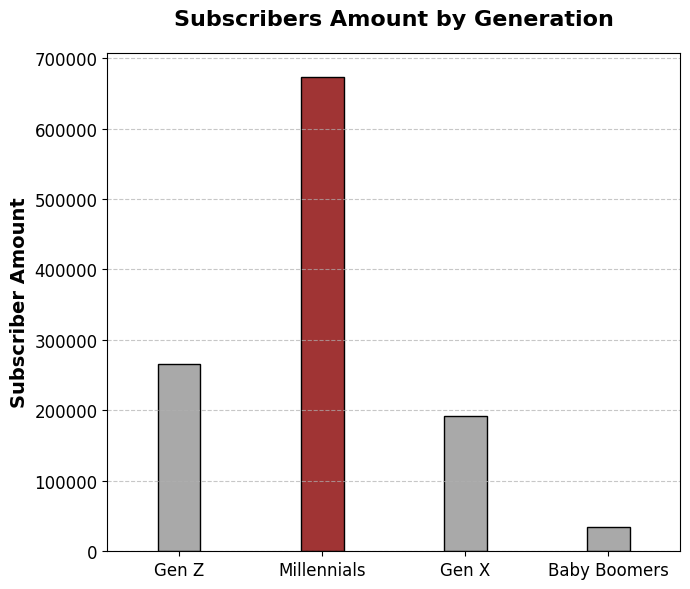

In [258]:
generation_riders = df_all.groupby('generation')['from_station_name'].count()
generation_riders = generation_riders.reset_index()

colors = ['darkgrey', 'firebrick', 'darkgrey', 'darkgrey']

plt.figure(figsize=(7, 6))
sns.barplot(x='generation', y='from_station_name', data=generation_riders, palette=colors, width=0.3, edgecolor='black')
plt.title('Subscribers Amount by Generation', fontsize=16, fontweight='bold', pad=20)
plt.xlabel(None)
plt.ylabel('Subscriber Amount', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<span style='color:blue'><b>Notes</b></span>: We found that the vast majority of subscriber users are from the Millenial generation

Thus, we can conclude that digital media marketing will affect convert rate significantly because this generation utilizes various form of technology in daily basis.

<span style='color:red'><b>Marketing Techniques</b></span>: Using the information that we have gathered, we have decided to use 'The Line' marketing technique

This marketing technique consists of : Above the line, through the line, and below the line marketing. However, because we are focusing on converting our consumer to member, then we will only be using two of them : through the line and also below the line technique.

<span style='color:blue'><b>Through The Line</b></span>: To escalate awareness and help with convertion rate

- Since, the vast majority of customers are using divvy bikes to go to recreational places, we proposed to make a collaboration between the company and said recreational places. This will be mutually beneficial since it will increase traffic both ways.

<span style='color:blue'><b>Below The Line</b></span>: To significantly incarease convertion rate

- We will target existing customer of divvy bikes and give personalized emails and in-app offers
- Using tripwire such as free trials